In [13]:
#A notebook for Tweet Sentiment Analysis by Jonathan Ivy

In [35]:
import tweepy
import re
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [15]:
from tweepy import OAuthHandler #does the job of authenticating our client machine with Twitter server

In [16]:
#Now initialize all keys we need, and they should be entered in the form of strings

In [17]:
consumer_key = 'fyYq7oF0KxkUdeI2zwGCKV8GQ'
consumer_secret = 'Avne5z6Jo2ycAvWA5ZgLqEyz6rDIC9dp2OkIQpQg4zpOZvpG4f'
access_token = '3233029615-v2xFc4THm1pXk6OR5DhqXdIjEc8RdJzQNscqgZ1'
access_secret='Lq8kBfo3k1BtZW6lFSah06MZhqV6eOyYFeNsguSGAjW1E'

In [18]:
#Authenticate Client, because every App we build will have unique keys and secrets
auth = OAuthHandler(consumer_key,consumer_secret)

In [19]:
auth.set_access_token(access_token,access_secret)

In [20]:
#set our search tokens
args = ['Mask']

In [21]:
api = tweepy.API(auth,timeout=10)#if we don't find any tweets, after 10 seconds API stops looking

In [22]:
#Declare a list
list_tweets = []

In [24]:
query = args [0]

In [25]:
if len(args) == 1:
    for status in tweepy.Cursor (api.search, q=query+"-filter:retweets", lang='en', result_type = 'recent', tweet_mode='extended').items(100):
        list_tweets.append(status.full_text)#status is a JSON object in Python
    #cursor is another library to fetch tweets

In [28]:
list_tweets

["We can't wait to see fans back at LaVell Edwards Stadium tonight!!\n\nRemember:\n• Mask up\n• Social distance\n• Sit in your assigned seats\n\n#BYUFOOTBALL #GoCougs https://t.co/gvhEwvyCUF",
 "@Arlecchinoswart @radleybalko I will generally wear a mask in public,  not because I think it significantly reduces my or anyone else's risk of COVID, but as a courtesy to the fearful. Impose a mandate and I will resist.",
 'see THIS girl RESPECTS him and wore a mask https://t.co/YKeOseRmun',
 '@bostonjsteven @DJSteveLawler @realDonaldTrump Says the deficiente, questioning my patriotism, while he is probably spreading his COVID-19 to other Americans. Only because he can’t figure which end to use when putting on a mask.',
 "@vancouverboomer Oh they are, it's just that some people get on the bus with a mask and then take it off. This asshole was wearing a mask until he overheard a conversation that I was having and then took it off and started in about how they aren't necessary since covid is all

In [26]:
#To classify tweets we need our Tfidf and classifier models
with open ('tfidfmodel.pickle','rb') as f:
    vectorizer = pickle.load (f)

In [27]:
with open ('classifier.pickle','rb') as f:
    clf = pickle.load(f)

In [29]:
#Let's try if it works or not
clf.predict(vectorizer.transform(['You are terrible Mr!']))

array([0])

In [30]:
total_pos=0
total_neg=0

In [31]:
#Pre-process Tweets we have collected
for tweet in list_tweets:
    tweet=re.sub(r"^http://t.co/[a-zA-Z09]*\s"," ",tweet) #remove links
    tweet=re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s"," ",tweet)
    tweet=re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$"," ",tweet)
    tweet=tweet.lower()
    tweet=re.sub(r"that's","that is", tweet)
    tweet=re.sub(r"there's","there is", tweet)
    tweet=re.sub(r"what's","what is", tweet)
    tweet=re.sub(r"where's","where is", tweet)
    tweet=re.sub(r"it's","it is", tweet)
    tweet=re.sub(r"who's","who is", tweet)
    tweet=re.sub(r"i'm","i am", tweet)
    tweet=re.sub(r"she's","she is", tweet)
    tweet=re.sub(r"he's","he is", tweet)
    tweet=re.sub(r"they're","they are", tweet)
    tweet=re.sub(r"who're","who are", tweet)
    tweet=re.sub(r"ain't","am not", tweet)
    tweet=re.sub(r"wouldn't","would not", tweet)
    tweet=re.sub(r"can't","can not", tweet)
    tweet=re.sub(r"could't","could not", tweet)
    tweet=re.sub(r"won't","wil not", tweet)
    tweet=re.sub(r"\W"," ", tweet)
    tweet=re.sub(r"\d"," ", tweet)
    tweet=re.sub(r"\s+[a-z]\s+"," ", tweet)
    tweet=re.sub(r"\s+[a-z]$"," ", tweet)
    tweet=re.sub(r"^[a-z]\+s"," ", tweet)
    tweet=re.sub(r"\s+"," ", tweet)
    #Predicting Sentiment of Tweets
    sent = clf.predict(vectorizer.transform([tweet]).toarray())
    #Increase sentinment variables based on tweet sentiment
    if sent[0] == 1:
        total_pos +=1
    else:
        total_neg+=1
    
    print("cleaned tweets:", tweet,sent)

cleaned tweets: we can not wait to see fans back at lavell edwards stadium tonight remember mask up social distance sit in your assigned seats byufootball gocougs  [1]
cleaned tweets:  arlecchinoswart radleybalko will generally wear mask in public not because think it significantly reduces my or anyone else risk of covid but as courtesy to the fearful impose mandate and will resist  [0]
cleaned tweets: see this girl respects him and wore mask  [0]
cleaned tweets:  bostonjsteven djstevelawler realdonaldtrump says the deficiente questioning my patriotism while he is probably spreading his covid to other americans only because he can figure which end to use when putting on mask  [0]
cleaned tweets:  vancouverboomer oh they are it is just that some people get on the bus with mask and then take it off this asshole was wearing mask until he overheard conversation that was having and then took it off and started in about how they aren necessary since covid is all lie  [1]
cleaned tweets: put 

In [32]:
#Plotting the results
#First, we will declare two variables before the cleaning loop to put total number of pos or neg words

In [33]:
print (total_neg)

39


In [34]:
print (total_pos)

61


In [36]:
objects = ['Positive','Negative']

In [37]:
y_pos = np.arange (len(objects))#we need the position of y

Text(0.5, 1.0, 'Number of Positive and Negative Tweets')

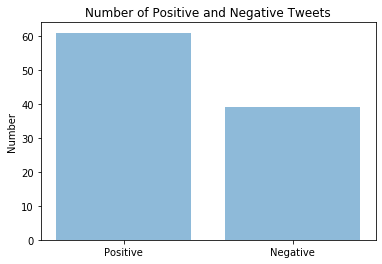

In [38]:
#Plot the results and visualize the data
plt.bar(y_pos,[total_pos,total_neg],alpha=0.5);
plt.xticks(y_pos,objects)
plt.ylabel("Number")
plt.title("Number of Positive and Negative Tweets")